In [1]:
import pandas as pd
import cvxpy as cvx
%pylab inline
import seaborn as sns


mpl.rcParams['font.size'] = 16.


# This file contains sample diffraction metadata from experiments performed at XPP in November 2017
metadataFN = 'metadata.csv'

Populating the interactive namespace from numpy and matplotlib


In [2]:
M = pd.read_csv(metadataFN)
M['ipm2_1'] = [float(i[0]) for i in map(lambda x: x.split(','), M['ipm2_channels'])]
M['ipm2_2'] = [float(i[1]) for i in map(lambda x: x.split(','), M['ipm2_channels'])]
M['ipm2_3'] = [float(i[2]) for i in map(lambda x: x.split(','), M['ipm2_channels'])]
M['ipm2_4'] = [float(i[3]) for i in map(lambda x: x.split(','), M['ipm2_channels'])]

/home/kevin/opt/anaconda2/lib/python2.7/site-packages/seaborn/categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/home/kevin/opt/anaconda2/lib/python2.7/site-packages/seaborn/categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


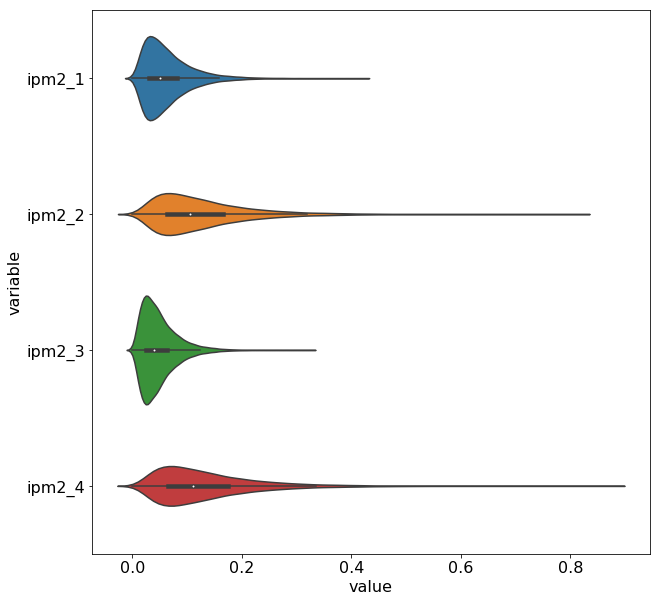

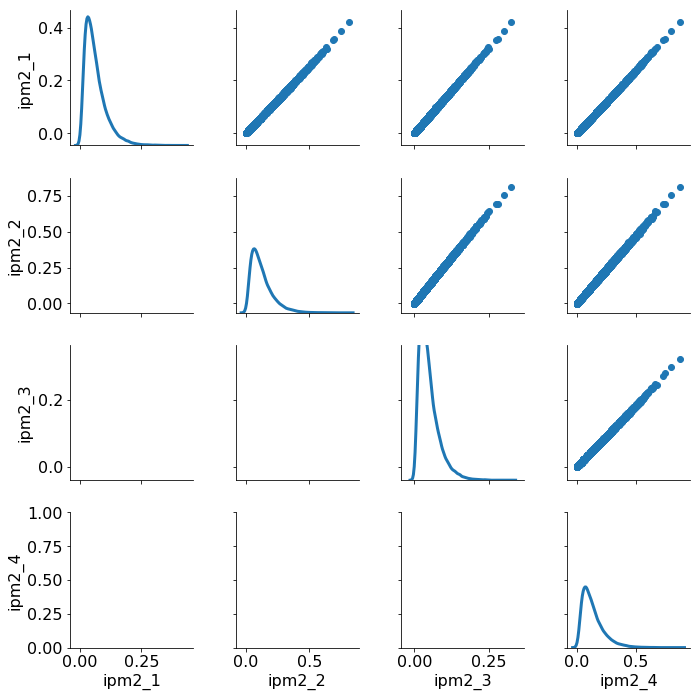

In [3]:
def splatterplot(X, Y):
    plt.scatter(X, Y, facecolors='none', edgecolors='k', alpha=0.1)
    


plt.figure(figsize=(10,10))
sns.violinplot(y='variable', x='value', data=pd.melt(M[['ipm2_1', 'ipm2_2', 'ipm2_3', 'ipm2_4']]))


g = sns.PairGrid(M[['ipm2_1', 'ipm2_2', 'ipm2_3', 'ipm2_4']])
g = g.map_upper(plt.scatter)
g = g.map_diag(sns.kdeplot, lw=3, legend=False)


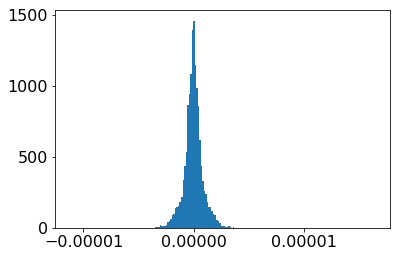

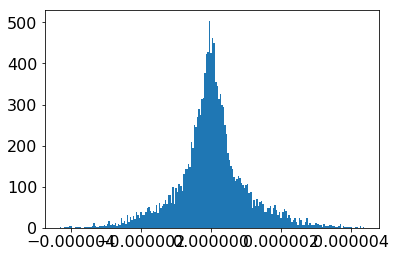

In [19]:
hist(M['ipm2_ypos'] - (M['ipm2_1'] - M['ipm2_3'])/(M['ipm2_1'] + M['ipm2_3']), 200)
figure()
dv = hist(M['ipm2_xpos'] - (M['ipm2_2'] - M['ipm2_4'])/(M['ipm2_2'] + M['ipm2_4']), 200)